In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/iris.csv")
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
x = df[features]
y = df["species"]

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


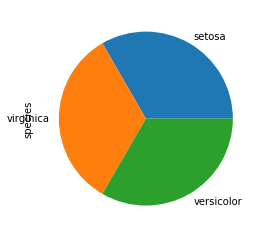

In [21]:
df["species"].value_counts().plot.pie();

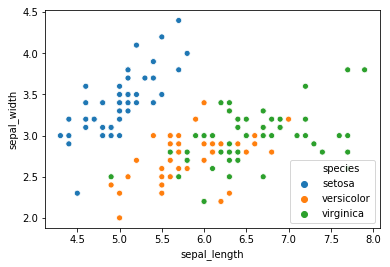

In [5]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width", hue="species");

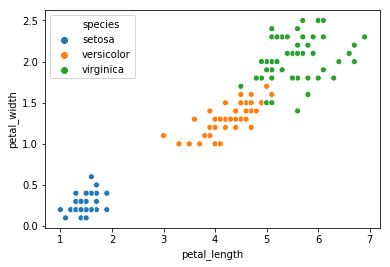

In [6]:
sns.scatterplot(data=df, x="petal_length", y="petal_width", hue="species");

# PCA

In [7]:
from sklearn.decomposition import PCA

pca   = PCA(n_components=2)
x_pca = pca.fit_transform(x)

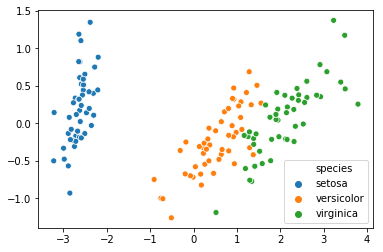

In [8]:
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y);

In [9]:
pd.DataFrame(pca.components_, columns=x.columns, index = ['PC 1','PC 2'])

,sepal_length,sepal_width,petal_length,petal_width
PC 1,0.36159,-0.082269,0.856572,0.358844
PC 2,0.65654,0.729712,-0.175767,-0.074706


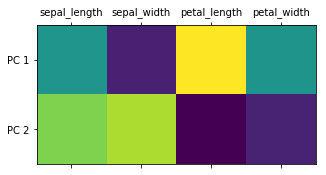

In [10]:
plt.figure(figsize=(5,2.5))
plt.matshow(pca.components_, cmap='viridis', fignum=1)
plt.yticks(range(2), ['PC 1','PC 2'])
plt.xticks(range(4), features);

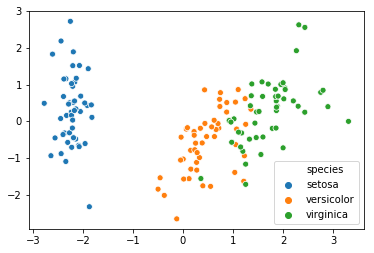

In [11]:
from sklearn import preprocessing

x_scaled = pd.DataFrame(preprocessing.scale(x), columns=x.columns) 

pca   = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=y);

In [12]:
pd.DataFrame(pca.components_, columns=x.columns, index = ['PC-1','PC-2'])

,sepal_length,sepal_width,petal_length,petal_width
PC-1,0.522372,-0.263355,0.581254,0.565611
PC-2,0.372318,0.925556,0.021095,0.065416


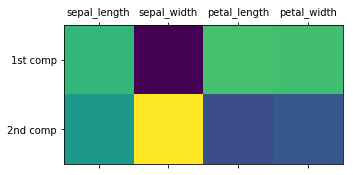

In [13]:
plt.figure(figsize=(5,2.5))
plt.matshow(pca.components_, cmap='viridis', fignum=1)
plt.yticks(range(2),['1st comp','2nd comp'],fontsize=10)
plt.xticks(range(4),features);

In [14]:
pca.singular_values_

array([20.89551896, 11.75513248])

# tSNE

In [15]:
from sklearn.manifold import TSNE

C:\Users\Javi\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:326: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


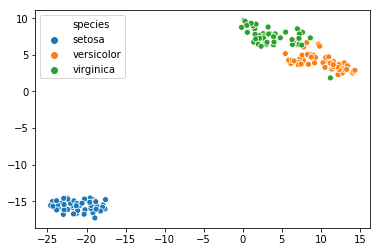

In [16]:
x_tsne = TSNE().fit_transform(x)
sns.scatterplot(x=x_tsne[:, 0], y=x_tsne[:, 1], hue=y);

# LDA

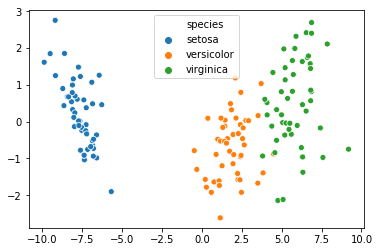

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

x_lda = LinearDiscriminantAnalysis().fit_transform(x, y)

sns.scatterplot(x=x_lda[:, 0], y=x_lda[:, 1], hue=y);

# Parallel coordinates

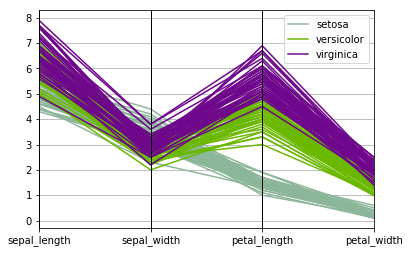

In [18]:
from pandas.plotting import parallel_coordinates

parallel_coordinates(df, class_column="species");

# Andrews curves

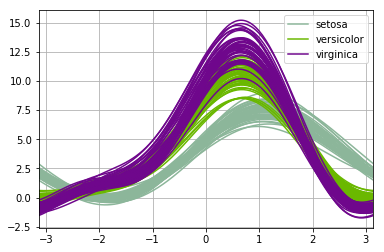

In [19]:
from pandas.plotting import andrews_curves

andrews_curves(df, "species");

# RadViz

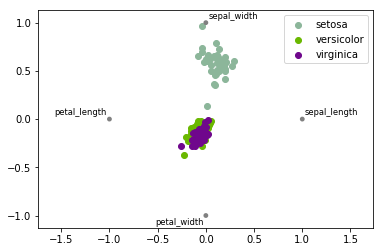

In [20]:
from pandas.plotting import radviz

radviz(df, "species");